In [23]:
pip install Sastrawi

Note: you may need to restart the kernel to use updated packages.


In [24]:
# Import Library
import pandas as pd
import nltk
import re

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import seaborn as sns
from nltk.util import ngrams
from collections import defaultdict

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

import numpy as np
import os

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chris\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chris\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\chris\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [25]:
!dir

 Volume in drive C is Windows-SSD
 Volume Serial Number is C4BD-987B

 Directory of c:\Users\chris\OneDrive\Desktop\Binar DS\FGD 16

05/12/2022  15:51    <DIR>          .
04/12/2022  20:23    <DIR>          ..
28/11/2022  20:26    <DIR>          .ipynb_checkpoints
15/04/2020  14:27               975 abusive.csv
28/11/2022  20:29             1.822 app.py
15/04/2020  14:27             1.535 citation.bib
15/04/2020  14:27         1.858.473 data.csv
05/12/2022  15:50             2.670 file_pre.py
28/11/2022  06:40            10.100 indo_data50.csv
28/11/2022  06:40           845.366 indo_dataset.csv
28/11/2022  20:26           417.275 insert to db (1).ipynb
15/04/2020  14:27           285.941 new_kamusalay.csv
28/11/2022  20:02             2.237 pre.py
15/04/2020  14:27             2.770 README.md
28/11/2022  07:25    <DIR>          template
05/12/2022  01:17           109.127 Text Analysis.ipynb
28/11/2022  07:00             2.126 textProcessing.py
03/12/2022  23:12    <DIR>          Twit

In [26]:
data = pd.read_csv('data.csv', encoding='latin-1')

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13169 entries, 0 to 13168
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          13169 non-null  object
 1   HS             13169 non-null  int64 
 2   Abusive        13169 non-null  int64 
 3   HS_Individual  13169 non-null  int64 
 4   HS_Group       13169 non-null  int64 
 5   HS_Religion    13169 non-null  int64 
 6   HS_Race        13169 non-null  int64 
 7   HS_Physical    13169 non-null  int64 
 8   HS_Gender      13169 non-null  int64 
 9   HS_Other       13169 non-null  int64 
 10  HS_Weak        13169 non-null  int64 
 11  HS_Moderate    13169 non-null  int64 
 12  HS_Strong      13169 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 1.3+ MB


In [28]:
print("Shape:", data.shape)
data.head()

Shape: (13169, 13)


,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0


**Preprocessing Data**

In [29]:
def remove(Tweet):
    #rhapus rt
    Tweet = re.sub(r'^RT[\s]+', '', Tweet)
    #hapus user
    Tweet = re.sub('USER', '',Tweet)
    #hapus angka
    Tweet = re.sub('[0-9]+', '', Tweet)
    #hapus symbol
    Tweet = re.sub(r'\$\w*', '', Tweet)
    return Tweet
data['Tweet'] = data['Tweet'].apply(lambda x:remove(x))

In [30]:
data.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,: siapa yang telat ngasih tau elu?edan sarap ...,0,1,0,0,0,0,0,0,0,0,0,0
2,". Kadang aku berfikir, kenapa aku tetap percay...",0,0,0,0,0,0,0,0,0,0,0,0
3,AKU ITU AKU\n\nKU TAU MATAMU SIPIT TAPI DILI...,0,0,0,0,0,0,0,0,0,0,0,0
4,Kaum cebong kapir udah keliatan dongoknya da...,1,1,0,1,1,0,0,0,0,0,1,0


In [31]:
def data_cleaning(text):
    html_tag = re.compile(r'<.-:*?>')
    text = re.sub(html_tag, r'', text)

    http_link = re.compile(r'https://\S+')
    www_link = re.compile(r'www\.\S+')
    
    text = re.sub(http_link, r'', text)
    text = re.sub(www_link, r'', text)

    punctuation = re.compile(r'[^\w\s]')
    text = re.sub(punctuation, r'', text)

    return text

In [32]:
#mendefinisikan nama kolom yang akan dipakai
name_column_dataset = "Tweet"

In [33]:
#cleaning data
data[name_column_dataset] = data[name_column_dataset].apply(lambda x: x.lower())
data["remove_punc"] = data[name_column_dataset].apply(lambda x: data_cleaning(x))
data["clean"] = data["remove_punc"].apply(lambda x: word_tokenize(x))

In [34]:
data.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,remove_punc,clean
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,disaat semua cowok berusaha melacak perhatian...,"[disaat, semua, cowok, berusaha, melacak, perh..."
1,: siapa yang telat ngasih tau elu?edan sarap ...,0,1,0,0,0,0,0,0,0,0,0,0,siapa yang telat ngasih tau eluedan sarap gu...,"[siapa, yang, telat, ngasih, tau, eluedan, sar..."
2,". kadang aku berfikir, kenapa aku tetap percay...",0,0,0,0,0,0,0,0,0,0,0,0,kadang aku berfikir kenapa aku tetap percaya ...,"[kadang, aku, berfikir, kenapa, aku, tetap, pe..."
3,aku itu aku\n\nku tau matamu sipit tapi dili...,0,0,0,0,0,0,0,0,0,0,0,0,aku itu akunnku tau matamu sipit tapi diliat...,"[aku, itu, akunnku, tau, matamu, sipit, tapi, ..."
4,kaum cebong kapir udah keliatan dongoknya da...,1,1,0,1,1,0,0,0,0,0,1,0,kaum cebong kapir udah keliatan dongoknya da...,"[kaum, cebong, kapir, udah, keliatan, dongokny..."


In [35]:
df_alay = pd.read_csv('new_kamusalay.csv', encoding='latin-1', header=None)
df_alay = df_alay.rename(columns={0: 'source',
                              1: 'result'})

In [36]:
df_alay

,source,result
0,anakjakartaasikasik,anak jakarta asyik asyik
1,pakcikdahtua,pak cik sudah tua
2,pakcikmudalagi,pak cik muda lagi
3,t3tapjokowi,tetap jokowi
4,3x,tiga kali
...,...,...
15162,mendikbud,menteri pendidikan dan kebudayaan
15163,mendag,menteri perdagangan
15164,menaker,menteri tenaga kerja
15165,memetwit,mentwit


In [37]:
dict_alay = []
for i in range(len(df_alay)):
    dict_1 = {'before':df_alay['source'][i], 'after': df_alay['result'][i]}
    dict_alay.append(dict_1)

In [38]:
word_ = ['aku', 'elu', ' udah']
word_clean = []
for i in word_:
    if i in df_alay['source']:
        k = df_alay['result']
        word_clean.append(k)
    else :
        word_clean.append(i)
kal_clean = ' '.join(word_clean)

In [39]:
#lemmatizing
start_time = datetime.now()
lemmatizer = WordNetLemmatizer()
data["clean"] = data["clean"].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
end_lema = datetime.now()
print ("lema done",(end_lema - start_time))

lema done 0:00:02.109235


In [40]:
#steamming data
start = datetime.now()
factory = StemmerFactory()
stemmer = factory.create_stemmer()
data["clean"] = data["clean"].apply(lambda x: " ".join(stemmer.stem(word) for word in x))
end_stem = datetime.now()
print ("stemmer done",(start-end_stem))

stemmer done -1 day, 23:00:12.416187


In [41]:
#stopword
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()
data['clean'] = data['clean'].apply(lambda x: " ".join(stopword.remove(x) for x in x.split()))
end_stop = datetime.now()
print ("stopword done", (end_stop - end_stem))

stopword done 0:00:16.084104


In [42]:
data.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,remove_punc,clean
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,disaat semua cowok berusaha melacak perhatian...,semua cowok usaha lacak perhati gue loe lanta...
1,: siapa yang telat ngasih tau elu?edan sarap ...,0,1,0,0,0,0,0,0,0,0,0,0,siapa yang telat ngasih tau eluedan sarap gu...,siapa telat ngasih tau eluedan sarap gue gaul...
2,". kadang aku berfikir, kenapa aku tetap percay...",0,0,0,0,0,0,0,0,0,0,0,0,kadang aku berfikir kenapa aku tetap percaya ...,kadang aku berfikir aku tetap percaya tuhan ...
3,aku itu aku\n\nku tau matamu sipit tapi dili...,0,0,0,0,0,0,0,0,0,0,0,0,aku itu akunnku tau matamu sipit tapi diliat...,aku akunnku tau mata sipit liat mana aku
4,kaum cebong kapir udah keliatan dongoknya da...,1,1,0,1,1,0,0,0,0,0,1,0,kaum cebong kapir udah keliatan dongoknya da...,kaum cebong kapir udah liat dongok awal tamba...


In [43]:
data.info

<bound method DataFrame.info of                                                    Tweet  HS  Abusive  \
0      - disaat semua cowok berusaha melacak perhatia...   1        1   
1      :  siapa yang telat ngasih tau elu?edan sarap ...   0        1   
2      . kadang aku berfikir, kenapa aku tetap percay...   0        0   
3        aku itu aku\n\nku tau matamu sipit tapi dili...   0        0   
4        kaum cebong kapir udah keliatan dongoknya da...   1        1   
...                                                  ...  ..      ...   
13164   jangan asal ngomong ndasmu. congor lu yg seka...   1        1   
13165                            kasur mana enak kunyuk'   0        1   
13166   hati hati bisu :( .g\n\nlagi bosan huft \xf\x...   0        0   
13167      bom yang real mudah terdeteksi bom yang te...   0        0   
13168   mana situ ngasih(": itu cuma foto ya kutil onta'   1        1   

       HS_Individual  HS_Group  HS_Religion  HS_Race  HS_Physical  HS_Gender  \
0          

In [44]:
data.to_csv('data_twitter_clean.csv')

In [49]:
pip install wordcloud

In [56]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from wordcloud import WordCloud

In [59]:
#data_ =(data['Tweet'])
word_ = pd.Series(' '.join(data['clean']).split())
text = ' '.join(word_)

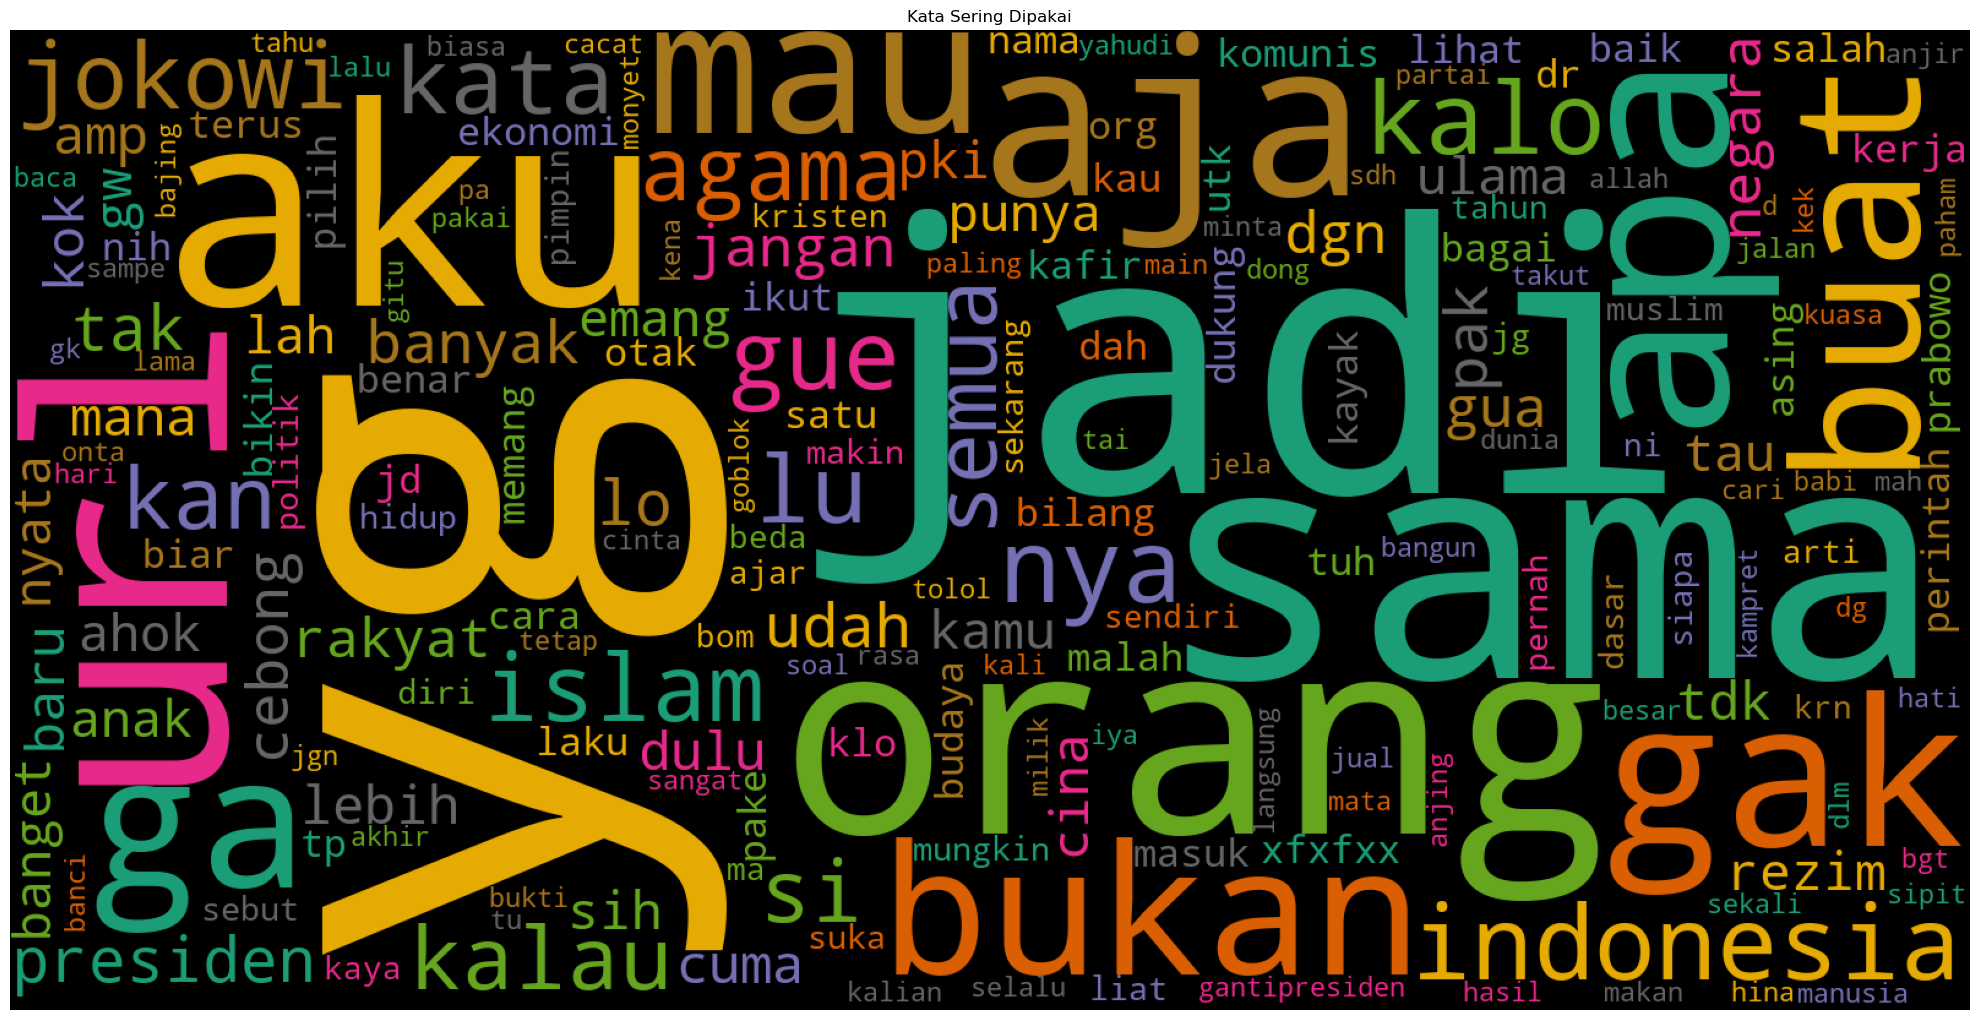

In [60]:
wordcloud = WordCloud(background_color='black', mode="RGB", width=1600, height=800, colormap="Dark2").generate(text)
plt.figure(figsize=(20,10))
plt.title('Kata Sering Dipakai')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [63]:
data.head(
)

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,remove_punc,clean
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,disaat semua cowok berusaha melacak perhatian...,semua cowok usaha lacak perhati gue loe lanta...
1,: siapa yang telat ngasih tau elu?edan sarap ...,0,1,0,0,0,0,0,0,0,0,0,0,siapa yang telat ngasih tau eluedan sarap gu...,siapa telat ngasih tau eluedan sarap gue gaul...
2,". kadang aku berfikir, kenapa aku tetap percay...",0,0,0,0,0,0,0,0,0,0,0,0,kadang aku berfikir kenapa aku tetap percaya ...,kadang aku berfikir aku tetap percaya tuhan ...
3,aku itu aku\n\nku tau matamu sipit tapi dili...,0,0,0,0,0,0,0,0,0,0,0,0,aku itu akunnku tau matamu sipit tapi diliat...,aku akunnku tau mata sipit liat mana aku
4,kaum cebong kapir udah keliatan dongoknya da...,1,1,0,1,1,0,0,0,0,0,1,0,kaum cebong kapir udah keliatan dongoknya da...,kaum cebong kapir udah liat dongok awal tamba...


<AxesSubplot:>

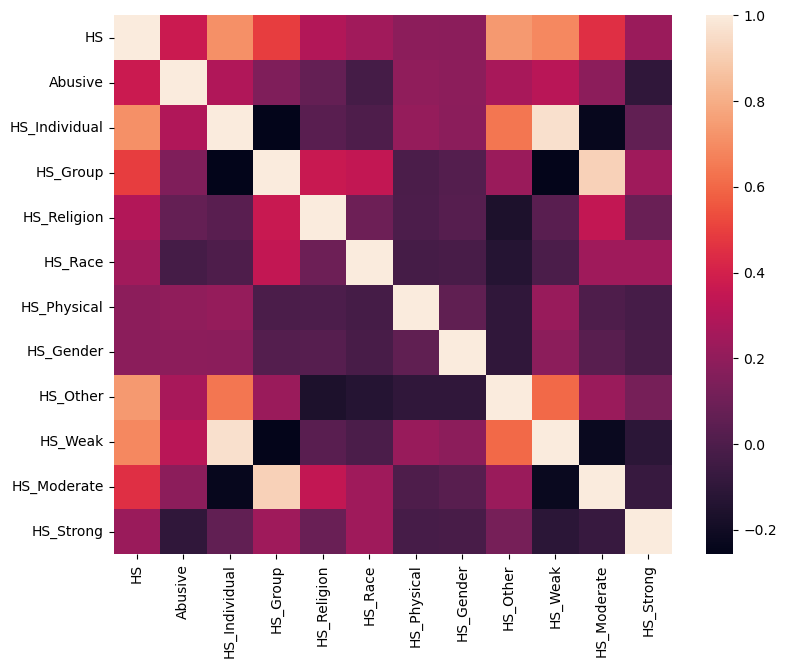

In [74]:

corr = data.corr()

plt.figure(figsize=(9,7))
sns.heatmap(corr)